In [2]:
import pandas as pd

In [4]:
crimes = pd.read_csv("Crimes2.csv")

In [5]:
crimes

,Date,Time,Primary.Type,Description,Location.Description,Arrest,Domestic,Latitude,Longitude,Holiday,...,precip,preciptype,snow,windgust,windspeed,cloudcover,visibility,solarradiation,uvindex,conditions
0,2010-01-01,09:00:00,THEFT,FROM BUILDING,MEDICAL/DENTAL OFFICE,False,False,41.875445,-87.711330,True,...,0.000,none,0.0,0.0,21.2,38.3,15.1,76.1,3,Partially cloudy
1,2010-01-01,10:54:00,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",PARKING LOT/GARAGE(NON.RESID.),False,False,41.866401,-87.705974,True,...,0.000,none,0.0,0.0,21.2,38.3,15.1,76.1,3,Partially cloudy
2,2010-01-01,00:00:00,DECEPTIVE PRACTICE,FORGERY,OTHER,False,False,41.874221,-87.736108,True,...,0.000,none,0.0,0.0,21.2,38.3,15.1,76.1,3,Partially cloudy
3,2010-01-01,09:00:00,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,41.870970,-87.704486,True,...,0.000,none,0.0,0.0,21.2,38.3,15.1,76.1,3,Partially cloudy
4,2010-01-01,05:00:00,SEX OFFENSE,OTHER,RESIDENCE,True,False,41.875890,-87.710838,True,...,0.000,none,0.0,0.0,21.2,38.3,15.1,76.1,3,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261846,2024-02-24,09:15:00,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),ALLEY,True,False,41.872714,-87.711658,False,...,0.213,"rain,snow",3.1,54.0,31.7,63.7,15.8,106.2,6,"Snow, Rain, Partially cloudy"
261847,2024-02-24,00:23:00,THEFT,$500 AND UNDER,STREET,False,False,41.879262,-87.744044,False,...,0.213,"rain,snow",3.1,54.0,31.7,63.7,15.8,106.2,6,"Snow, Rain, Partially cloudy"
261848,2024-02-24,20:13:00,NARCOTICS,MANUFACTURE / DELIVER - HEROIN (WHITE),SIDEWALK,False,False,41.885042,-87.725795,False,...,0.213,"rain,snow",3.1,54.0,31.7,63.7,15.8,106.2,6,"Snow, Rain, Partially cloudy"
261849,2024-02-24,23:00:00,OBSCENITY,OBSCENE MATTER,APARTMENT,True,True,41.877111,-87.723714,False,...,0.213,"rain,snow",3.1,54.0,31.7,63.7,15.8,106.2,6,"Snow, Rain, Partially cloudy"


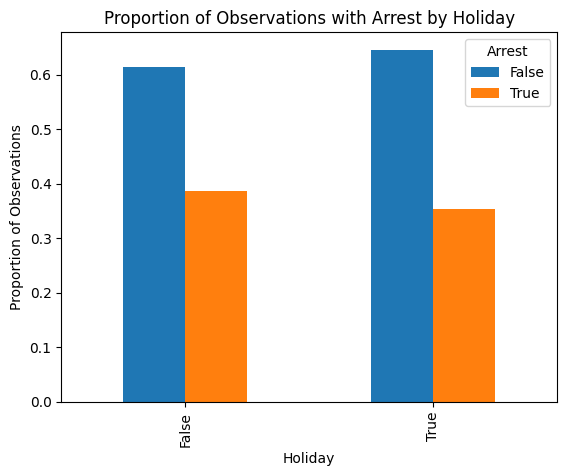

In [6]:
import matplotlib.pyplot as plt

arrest_by_holiday = (
    crimes.groupby('Holiday')['Arrest']
    .value_counts(normalize=True)
    .unstack()
    .plot(kind='bar')
)

plt.title('Proportion of Observations with Arrest by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Proportion of Observations')
plt.show()


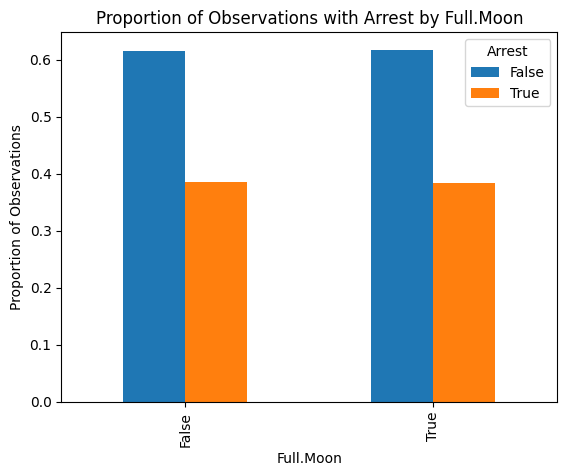

In [5]:
arrest_by_full_moon = (
    crimes.groupby('Full.Moon')['Arrest']
    .value_counts(normalize=True)
    .unstack()
    .plot(kind='bar')
)

plt.title('Proportion of Observations with Arrest by Full.Moon')
plt.xlabel('Full.Moon')
plt.ylabel('Proportion of Observations')
plt.show()


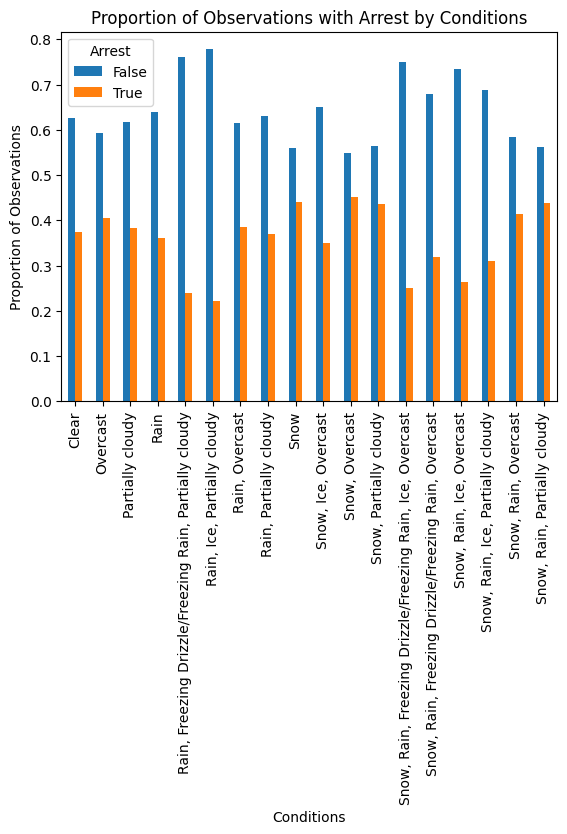

In [6]:
arrest_by_conditions = (
    crimes.groupby('conditions')['Arrest']
    .value_counts(normalize=True)
    .unstack()
    .plot(kind='bar')
)

plt.title('Proportion of Observations with Arrest by Conditions')
plt.xlabel('Conditions')
plt.ylabel('Proportion of Observations')
plt.show()


In [7]:
date_crimes = (
    crimes.groupby(['Date', 'Holiday', 'Full.Moon', 'conditions'])
    .size()
    .to_frame(name='Num.Crimes')
    .reset_index()
)

date_crimes


,Date,Holiday,Full.Moon,conditions,Num.Crimes
0,2010-01-01,True,False,Partially cloudy,74
1,2010-01-02,False,False,Partially cloudy,51
2,2010-01-03,False,False,Partially cloudy,44
3,2010-01-04,False,False,Overcast,52
4,2010-01-05,False,False,Overcast,52
...,...,...,...,...,...
5163,2024-02-20,False,False,Clear,42
5164,2024-02-21,False,False,Partially cloudy,35
5165,2024-02-22,False,False,Partially cloudy,33
5166,2024-02-23,False,False,"Snow, Rain, Partially cloudy",28


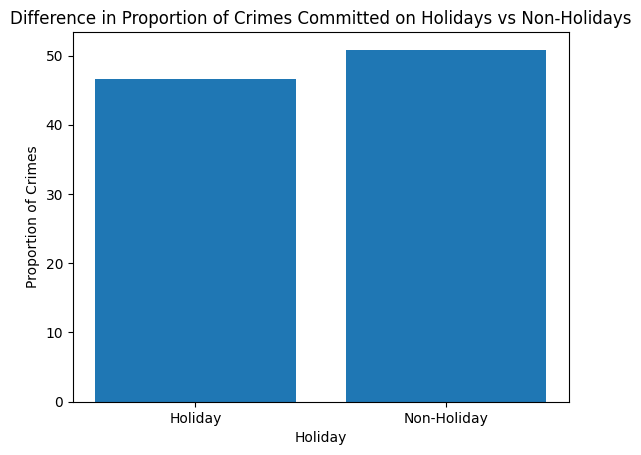

The difference in proportion of crimes committed on holidays vs non-holidays is -4.215238479417579


In [8]:
holiday_crimes = date_crimes[date_crimes['Holiday'] == True]
non_holiday_crimes = date_crimes[date_crimes['Holiday'] == False]

holiday_crime_rate = holiday_crimes['Num.Crimes'].sum() / len(holiday_crimes)
non_holiday_crime_rate = non_holiday_crimes['Num.Crimes'].sum() / len(non_holiday_crimes)

crime_rate_diff = holiday_crime_rate - non_holiday_crime_rate

plt.bar(['Holiday', 'Non-Holiday'], [holiday_crime_rate, non_holiday_crime_rate])
plt.title('Difference in Proportion of Crimes Committed on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Proportion of Crimes')
plt.show()

print(f'The difference in proportion of crimes committed on holidays vs non-holidays is {crime_rate_diff}')


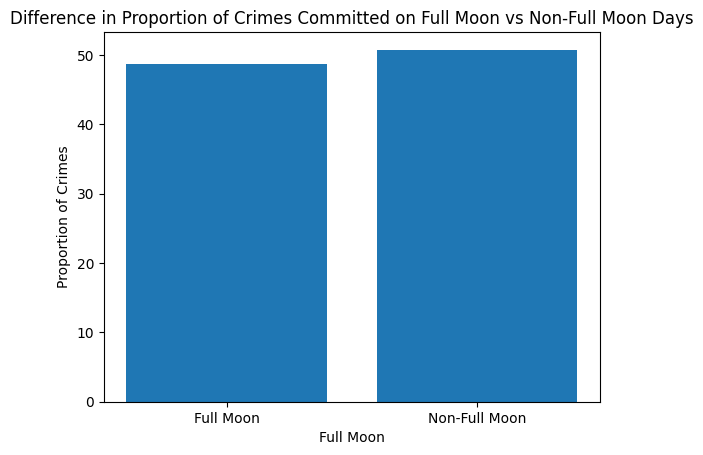

The difference in proportion of crimes committed on full moons vs non-full moons is -1.988669594449945


In [9]:
full_moon_crimes = date_crimes[date_crimes['Full.Moon'] == True]
non_full_moon_crimes = date_crimes[date_crimes['Full.Moon'] == False]

full_moon_crime_rate = full_moon_crimes['Num.Crimes'].sum() / len(full_moon_crimes)
non_full_moon_crime_rate = non_full_moon_crimes['Num.Crimes'].sum() / len(non_full_moon_crimes)

crime_rate_diff = full_moon_crime_rate - non_full_moon_crime_rate

plt.bar(['Full Moon', 'Non-Full Moon'], [full_moon_crime_rate, non_full_moon_crime_rate])
plt.title('Difference in Proportion of Crimes Committed on Full Moon vs Non-Full Moon Days')
plt.xlabel('Full Moon')
plt.ylabel('Proportion of Crimes')
plt.show()

print(f'The difference in proportion of crimes committed on full moons vs non-full moons is {crime_rate_diff}')


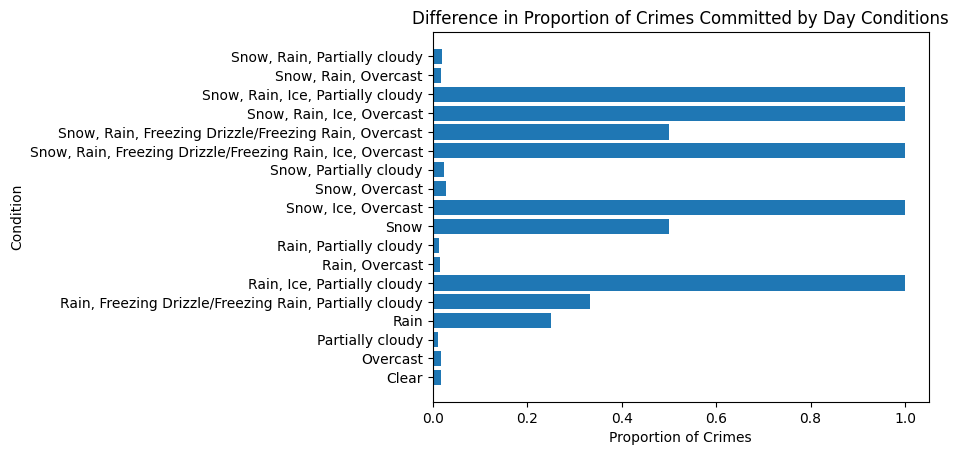

In [10]:
condition_crimes = (
    date_crimes.groupby('conditions')['Num.Crimes']
    .value_counts(normalize=True)
    .unstack()
)

condition_crime_rates = condition_crimes.mean(axis=1)

plt.barh(condition_crime_rates.index, condition_crime_rates.values)
plt.title('Difference in Proportion of Crimes Committed by Day Conditions')
plt.xlabel('Proportion of Crimes')
plt.ylabel('Condition')
plt.show()


In [ ]:
#date_crimes.to_csv("crimes3.csv", index=False)

In [7]:
full_crimes = (
    crimes.groupby(['Date', 'Holiday', 'Full.Moon', 'temp', 'preciptype', 'humidity'])
    .size()
    .to_frame(name='Num.Crimes')
    .reset_index()
)

full_crimes
full_crimes.to_csv("Crime_Full.csv", index=False)